
# Représentation graphique

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray*
<hr>

## Sommaire



## Nuage de points

### Matplotlib plt.scatter()

- Arguments : 
	- la couleur des points, en utilisant l’argument color ou c ;
	- la taille des points, via l’argument  size ou s ;
	- le type de marqueur via l’argument   marker ;
    - la transparence des points via l’argument alpha .
    
    
```
plt.scatter(prets['revenu'], prets['taux_endettement'], s=60, alpha=0.5, c='red', marker='P')
```

## Diagramme en bâtons ou tuyaux d'orgues

### Méthode .plot()
Pour obtenir les fréquences (= proportion), on peut éventuellement ajouter  ``normalize=True``. On obtient donc la distribution empirique. 

Variables qualitatives
```
# Diagramme en tuyaux d'orgues 
# . value_counts(Normalize) compte les valeurs et calcule la fréquence
data["categ"].value_counts(normalize=True).plot(kind='bar') 
plt.show()
```

Variables quantitatives
```
#Variable quart_mois pour avoir une représentation en bâton fin
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()
```

## Diagramme à barres empilées (stacked bar)

### Avec Matplotlib.pyplot

````
plt.figure(figsize=(10,7))
x=[df_genre.loc[df_genre['sex']=='f','categ']]
y1=df_genre.loc[df_genre['sex']=='f','nb_achat']
y2=df_genre.loc[df_genre['sex']=='m','nb_achat']

plt.bar(x, y1,color='firebrick')
plt.bar(x, y2, bottom=y1,color='lightcoral')
plt.xticks([0,1,2],[0,1,2])
plt.legend(['Femme','Homme'])
plt.title('Achats clients par genre et catégorie ',fontsize=11)
plt.show()
````

### Avec .groupby() et pandas

````
df_global.groupby('sex')['categ']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
````

### Avec .pivot_table() et pandas
````
df_global.pivot_table(index='sex', columns='categ',values='date', aggfunc='count').plot.bar(stacked=True)
````

## Diagramme en secteurs

### Matplotlib plt.pie()
- Argument:
	- autopct : affiche le pourcentage
	- explode 
    - colors

````
#Aggrégation des données et reset_index pour récupérer la donnée 'ville'
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()
#Tracer le graphique
plt.pie(x=data['remboursement'], labels=data['ville'])
#Affichage du pourcentage
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%')


# Diagramme en secteurs pour représenter la répartition des ventes par catégorie
data = df_final_ok.groupby('categ')['date'].count().reset_index()
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
colors = sns.color_palette("Reds")
plt.pie(x=data['date'], 
        labels=data['categ'],
        colors = colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 12},
        explode=(0,0,0.1), 
        shadow=True)

plt.title("Répartition des ventes par catégorie",fontsize=12, fontweight='bold')
plt.legend(title='Catégorie',
           labels={"categ 0 : 11,7€","categ 1 : 25,5€","categ 2 : 108,5€"},
           fontsize=11,
           loc="upper right")
plt.show()
````
![Capture%20d'%C3%A9cran_20221206_153825.png](attachment:Capture%20d'%C3%A9cran_20221206_153825.png)

### Méthode .plot()
```
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique
```



## Histogramme
### Méthode .hist()

La méthode .hist() regroupe les valeurs en classes : réalise la discrétisation (en anglais : binning, bucketing ou discretization).
=> pour les variables quantitatives continues

#### Le nombre optimal de classes :
Pour l'histogramme, il existe des règles pour déterminer le nombre optimal de classes. Par exemple, la règle de Sturges (1926) considère comme nombre optimal de classes :

$k=[1+log2(n)]$

où $n$ est la taille de l'échantillon.
```
# Histogramme
data["montant"].hist(density=True)# Regroupe les valeurs en class
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)#Bins définit le nombre de classe
plt.show()
```

## Boxplot

### Discrétisation et affichage de boxplots par classe

##### Exemple 1

```
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()
```

![16342182739597_graphs1.png](attachment:16342182739597_graphs1.png)

##### Exemple 2
````
import seaborn as sns
import matplotlib.pyplot as plt

data['cat'] = 0
data.loc[data['Age'] <= 30, 'cat'] = '- 30'
data.loc[(data['Age'] > 30) & (data['Age'] <= 40), 'cat'] = '30-40'
data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'cat'] = '40-50'
data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'cat'] = '50-60'
data.loc[(data['Age'] > 60), 'cat'] = '60+'

sns.boxplot(y='Position', x='cat', data=dt, orient='v')
plt.show()
````
![16347129153807_Sans%20titre.png](attachment:16347129153807_Sans%20titre.png)

### Variable quantitative en fonction d'une variable qualitative
````
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER"] 

# Affichage du graphique
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
````
Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.
![15150547555684_2quanti.png](attachment:15150547555684_2quanti.png)

## Sous forme de tableau

- modalité : quart de mois
- effectif : nombre d'occurence de chaque valeur de la modalité
- f : fréquence
- F : fréquence cumulée

```
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
````

![fr%C3%A9quence.png](attachment:fr%C3%A9quence.png)

## Sous forme de heat map

````
X = "quart_mois"
Y = "categ"

cont = operations[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
#len compte le nombre d'individus


import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(operations)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
````
![15151443790783_conting2.png](attachment:15151443790783_conting2.png)

source : [https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

````
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
````
![Capture%20d%E2%80%99%C3%A9cran%202023-01-16%20120229.png](attachment:Capture%20d%E2%80%99%C3%A9cran%202023-01-16%20120229.png)

### Radar chart

In [27]:
# import librairies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from math import pi

In [18]:
# Set dataframe
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [50]:
# Define a function that do a plot for one line of the dataset
 
def make_spider(data, group, row, title, color):

    # number of variable
    categories=list(data)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # define number of subplot
    if len(data.index)%2 !=0:
        line = round((len(data.index)+1)/2)
    else:
         line = round(len(data.index)/2)
            
    # Initialise the spider plot
    ax = plt.subplot(line,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=data.loc[row].drop(group).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [46]:
my_palette(0)

(0.4, 0.7607843137254902, 0.6470588235294118, 1.0)

In [47]:
my_palette(1)

(0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0)

C:\Users\Adeline\AppData\Local\Temp\ipykernel_26836\272732126.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = cm.get_cmap("Set2", len(df.index))


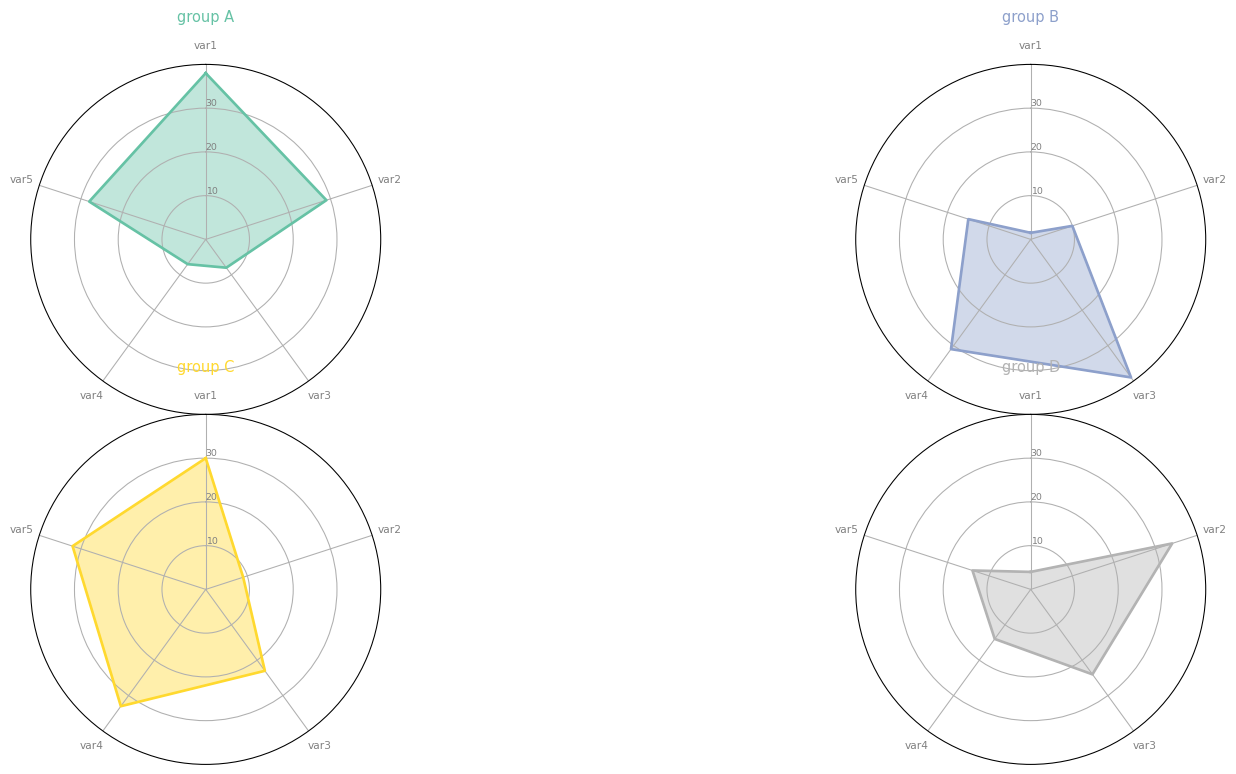

In [49]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider(data=df, 
                group='group', 
                row=row, 
                title='group '+df['group'][row], 
                color=my_palette(row))

In [ ]:
def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()